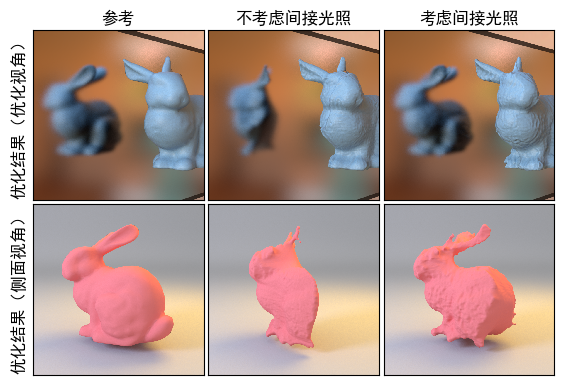

In [4]:
%reload_ext autoreload
%autoreload 2

import sys,os
sys.path.append(os.path.abspath('../'))
from common import *

fig_name = 'indirect_reparam'
fig_dir = join(FIGURE_DIR, fig_name)

from indirect_reparam import results

matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体

fontsize = 12
n_rows = 2 * len(results) 
n_cols = 3
total_width = COLUMN_WIDTH
aspect = n_rows / n_cols

fig = plt.figure(1, figsize=(total_width, aspect * total_width), constrained_layout=False)
gs = fig.add_gridspec(n_rows, n_cols, wspace=0.025, hspace=0.025)
row = 0
title_offset = 1.07

names = ['参考', '不考虑间接光照', '考虑间接光照']
crops = [(135, 135, 70, 200), (100, 100, 100, 100)]
for result, crop in zip(results, crops):
    scene_name = result['scene']
    scene_configs = result['configs']


    col = 0
    ax = fig.add_subplot(gs[row, col])
    img = read_img(join(fig_dir, scene_name, 'ref.exr'))
    img = img[crop[0]:-crop[1], crop[2]:-crop[3], :]
    ax.imshow(img, interpolation='none')
    disable_ticks(ax)
    if row == 0:
        txt = ax.set_title(names[col], fontsize=fontsize, va='top', y=title_offset)
    ax.set_ylabel('优化结果（优化视角）', labelpad=5, fontsize=fontsize)
    col += 1
    for config in scene_configs:
        ax = fig.add_subplot(gs[row, col])
        img = read_img(join(fig_dir, scene_name, f'{config.name}-0.exr'))
        aspect = img.shape[0] / img.shape[1]
        img = img[crop[0]:-crop[1], crop[2]:-crop[3], :]
        ax.imshow(img, interpolation='none')
        disable_ticks(ax)
        if row == 0:
            txt = ax.set_title(names[col], fontsize=fontsize, va='top', y=title_offset)
        col += 1

    row += 1
    col = 0
    ax = fig.add_subplot(gs[row, col])
    img = read_img(join(fig_dir, scene_name, 'geo-ref.exr'))
    ax.imshow(img, interpolation='none')
    disable_ticks(ax)
    ax.set_ylabel('优化结果（侧面视角）', labelpad=5, fontsize=fontsize)
    if row == 0:
        txt = ax.set_title(names[col], fontsize=fontsize, va='top', y=title_offset)
    col += 1
    for config in scene_configs:
        ax = fig.add_subplot(gs[row, col])
        img = read_img(join(fig_dir, scene_name, f'{config.name}-1.exr'))
        aspect = img.shape[0] / img.shape[1]
        ax.imshow(img, interpolation='none')
        disable_ticks(ax)
        if row == 0:
            txt = ax.set_title(names[col], fontsize=fontsize, va='top', y=title_offset)
        col += 1
    row += 1

plt.margins(0, 0)
# save_fig(fig_name)